<a href="https://colab.research.google.com/github/ajay-m123/stock-price-pred-project/blob/main/Stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.shape

(619040, 7)

In [ ]:
df.head(10)

In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
394662,2015-10-30,123.10,123.69,119.85,119.85,3524576.0,MTB
394663,2015-11-02,120.93,121.57,120.06,120.27,1883212.0,MTB
394664,2015-11-03,120.37,120.90,119.66,120.14,956904.0,MTB
394665,2015-11-04,120.32,120.70,119.14,119.56,820272.0,MTB
394666,2015-,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394667 entries, 0 to 394666
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    394667 non-null  object 
 1   open    394661 non-null  float64
 2   high    394663 non-null  float64
 3   low     394663 non-null  float64
 4   close   394666 non-null  float64
 5   volume  394666 non-null  float64
 6   Name    394666 non-null  object 
dtypes: float64(5), object(2)
memory usage: 21.1+ MB


# EDA

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])

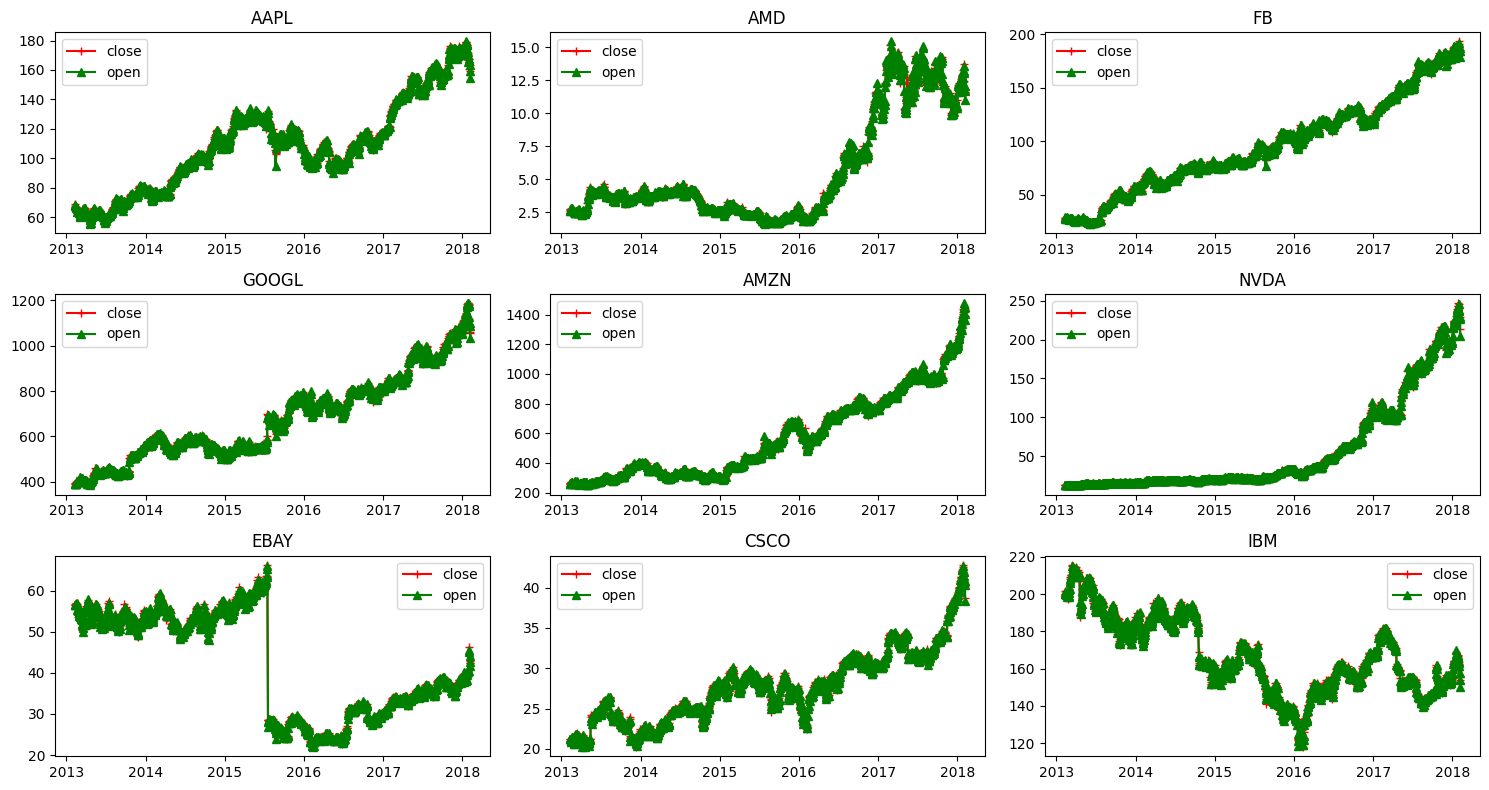

In [ ]:
df['date'] = pd.to_datetime(df['date'])
# date vs open
# date vs close

# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = df[df['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()



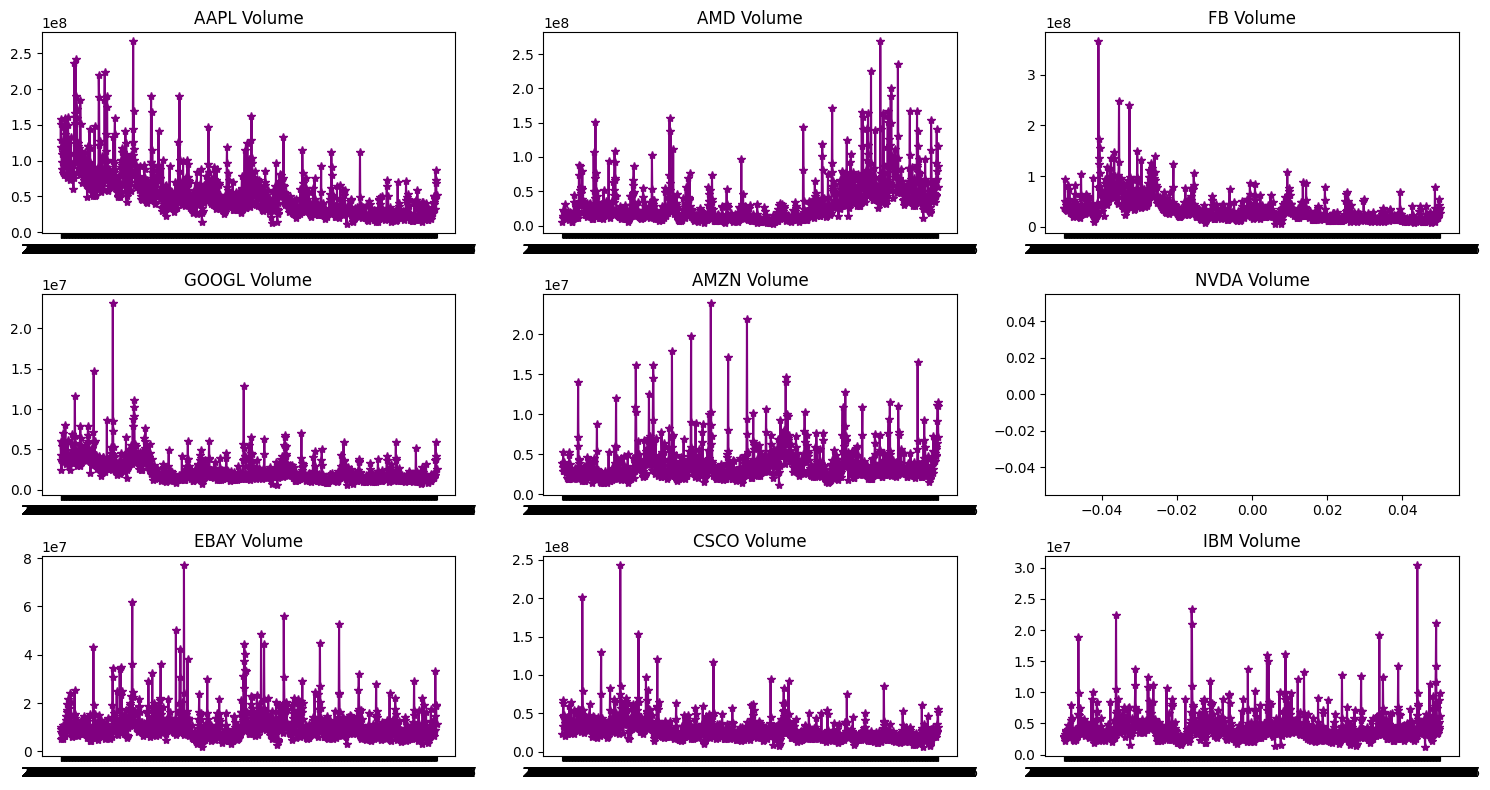

In [ ]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = df[df['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()


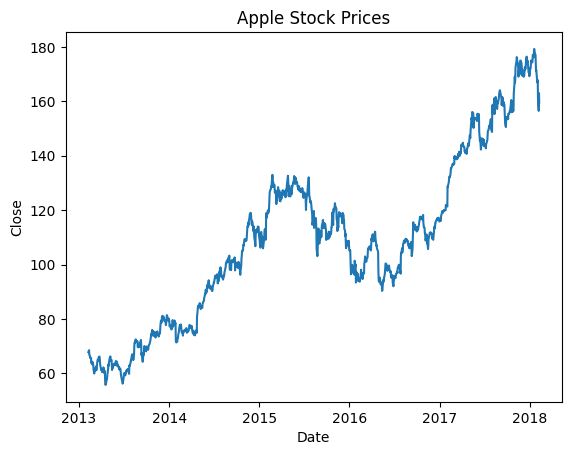

In [ ]:
apple = df[df['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [ ]:
close_df = apple.filter(['close'])
dataset = close_df.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [ ]:
# Machine learning


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
#Build Gated RNN- LSTM network using TensorFlow
#Using TensorFlow, we can easily create LSTM-gated RNN cells.
#LSTM is used in Recurrent Neural Networks for sequence models and time series data.
#LSTM is used to avoid the vanishing gradient issue which is widely occurred in training RNN.
#To stack multiple LSTM in TensorFlow it is mandatory to use return_sequences = True.
#Since our data is time series varying we apply no activation to the output layer and it remains as 1 node.


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
#Model Compilation and Training
#optimizer – This is the method that helps to optimize the cost function by using gradient descent.
#loss – The loss function by which we monitor whether the model is improving with training or not.
#metrics – This helps to evaluate the model by predicting the training and the validation data.

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0611
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0101
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0082
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0072
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0066
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0072
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0076
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0061
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0079
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0060


In [ ]:
#For predicting we require testing data, so we first create the testing data and then proceed with the model prediction.

In [ ]:
test_df = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_df)):
    x_test.append(test_df[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)        # mean squre error
print("RMSE", np.sqrt(mse))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
MSE 27.91223757888467
RMSE 5.283203344457288


In [ ]:
#Now that we have predicted the testing data, let us visualize the final results.

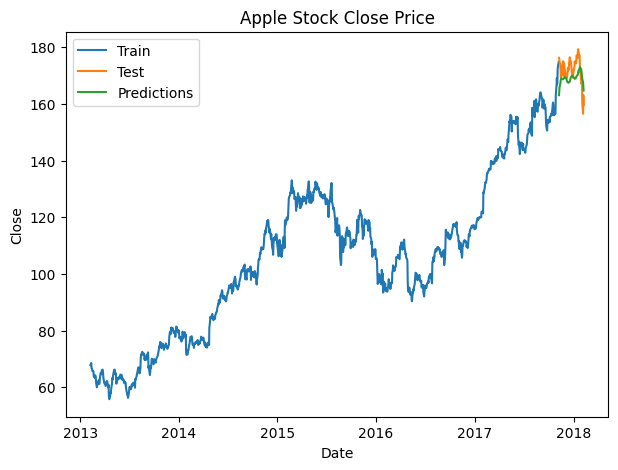

In [ ]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(7, 5))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])